In [1]:
# STEP 1: import necessary modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt 

# STEP 2: import data

#dataset 1: rating information  

columns_rating = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=columns_rating, usecols=range(3), encoding="ISO-8859-1")

#dataset 2: movie information
columns_movie = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(2), encoding="ISO-8859-1")

#merge dataset1 and dataset2
#ratings = pd.merge(movies, ratings)
df=pd.merge(ratings, movies, on='movie_id')

#dataset 3: user information
# user id | age | gender | occupation | zip code

columns_users=['user_id','age','gender','occupation', 'zip_code']
users=pd.read_csv('u.user',sep='|',names=columns_users)

# add user information
merged_data=pd.merge(df, users, on='user_id')

In [2]:
merged_data.head()

,user_id,movie_id,rating,title,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),49,M,writer,55105
1,196,257,2,Men in Black (1997),49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer,55105


In [3]:
reshaped_data = pd.pivot_table(merged_data, values=['rating'], index=['user_id','gender','occupation'],columns=['title'])

In [4]:
reshaped_data.tail()

rating               \
title                        'Til There Was You (1997) 1-900 (1994)   
user_id gender occupation                                             
939     F      student                             NaN          NaN   
940     M      administrator                       NaN          NaN   
941     M      student                             NaN          NaN   
942     F      librarian                           NaN          NaN   
943     M      student                             NaN          NaN   

                                                                        \
title                        101 Dalmatians (1996) 12 Angry Men (1957)   
user_id gender occupation                                                
939     F      student                         NaN                 NaN   
940     M      administrator                   NaN                 NaN   
941     M      student                         NaN                 NaN   
942     F      librarian                       NaN                 NaN   
943     M      student                         NaN                 NaN   

                                                                     \
title                        187 (1997) 2 Days in the Valley (1996)   
user_id gender occupation                                             
939     F      student              NaN                         NaN   
940     M      administrator        NaN                         NaN   
941     M      student              NaN                         NaN   
942     F      librarian            NaN                         NaN   
943     M      student              NaN                         2.0   

                                                                  \
title                        20,000 Leagues Under the Sea (1954)   
user_id gender occupation                                          
939     F      student                                       NaN   
940     M      administrator                                 NaN   
941     M      student                                       NaN   
942     F      librarian                                     NaN   
943     M      student                                       NaN   

                                                           \
title                        2001: A Space Odyssey (1968)   
user_id gender occupation                                   
939     F      student                                NaN   
940     M      administrator                          NaN   
941     M      student                                NaN   
942     F      librarian                              3.0   
943     M      student                                NaN   

                                                                          \
title                        3 Ninjas: High Noon At Mega Mountain (1998)   
user_id gender occupation                                                  
939     F      student                                               NaN   
940     M      administrator                                         NaN   
941     M      student                                               NaN   
942     F      librarian                                             NaN   
943     M      student                                               NaN   

                                                   ...                     \
title                        39 Steps, The (1935)  ... Yankee Zulu (1994)   
user_id gender occupation                          ...                      
939     F      student                        NaN  ...                NaN   
940     M      administrator                  NaN  ...                NaN   
941     M      student                        NaN  ...                NaN   
942     F      librarian                      3.0  ...                NaN   
943     M      student                        NaN  ...                NaN   

                                                         

In [5]:
reshaped_data=reshaped_data.fillna(3)

In [6]:
#reshaped_data.head()
reshaped_data=reshaped_data-reshaped_data.mean()
reshaped_data.tail()

rating               \
title                        'Til There Was You (1997) 1-900 (1994)   
user_id gender occupation                                             
939     F      student                        0.006363     0.002121   
940     M      administrator                  0.006363     0.002121   
941     M      student                        0.006363     0.002121   
942     F      librarian                      0.006363     0.002121   
943     M      student                        0.006363     0.002121   

                                                                        \
title                        101 Dalmatians (1996) 12 Angry Men (1957)   
user_id gender occupation                                                
939     F      student                    0.010604           -0.178155   
940     M      administrator              0.010604           -0.178155   
941     M      student                    0.010604           -0.178155   
942     F      librarian                  0.010604           -0.178155   
943     M      student                    0.010604           -0.178155   

                                                                     \
title                        187 (1997) 2 Days in the Valley (1996)   
user_id gender occupation                                             
939     F      student         -0.00106                   -0.022269   
940     M      administrator   -0.00106                   -0.022269   
941     M      student         -0.00106                   -0.022269   
942     F      librarian       -0.00106                   -0.022269   
943     M      student         -0.00106                   -1.022269   

                                                                  \
title                        20,000 Leagues Under the Sea (1954)   
user_id gender occupation                                          
939     F      student                                 -0.038176   
940     M      administrator                           -0.038176   
941     M      student                                 -0.038176   
942     F      librarian                               -0.038176   
943     M      student                                 -0.038176   

                                                           \
title                        2001: A Space Odyssey (1968)   
user_id gender occupation                                   
939     F      student                          -0.266172   
940     M      administrator                    -0.266172   
941     M      student                          -0.266172   
942     F      librarian                        -0.266172   
943     M      student                          -0.266172   

                                                                          \
title                        3 Ninjas: High Noon At Mega Mountain (1998)   
user_id gender occupation                                                  
939     F      student                                          0.010604   
940     M      administrator                                    0.010604   
941     M      student                                          0.010604   
942     F      librarian                                        0.010604   
943     M      student                                          0.010604   

                                                   ...                     \
title                        39 Steps, The (1935)  ... Yankee Zulu (1994)   
user_id gender occupation                          ...                      
939     F      student                  -0.065748  ...           0.002121   
940     M      administrator            -0.065748  ...           0.002121   
941     M      student                  -0.065748  ...           0.002121   
942     F      librarian                -0.065748  ...           0.002121   
943     M      student                  -0.065748  ...           0.002121   

                                                         

In [7]:
X = reshaped_data.values
y = reshaped_data.values
X.shape

(943, 1664)

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00106157e+00 -1.16499421e-03 -1.64134246e-03 ... -3.07390884e-03
   2.12803252e-03  0.00000000e+00]
 [-1.16499421e-03  1.00106157e+00 -5.98506377e-04 ... -1.12088372e-03
   7.75975193e-04  0.00000000e+00]
 [-1.64134246e-03 -5.98506377e-04  1.00106157e+00 ...  5.79880721e-02
  -5.04539275e-02  0.00000000e+00]
 ...
 [-3.07390884e-03 -1.12088372e-03  5.79880721e-02 ...  1.00106157e+00
   2.04745824e-03  0.00000000e+00]
 [ 2.12803252e-03  7.75975193e-04 -5.04539275e-02 ...  2.04745824e-03
   1.00106157e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [9]:
cov_mat.shape

(1664, 1664)

In [10]:
#eigendecomposition on the covariance matrix:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

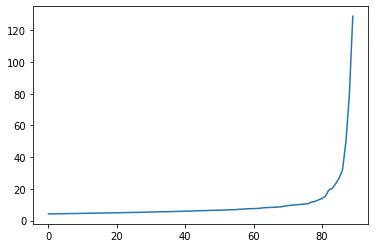

In [11]:
plt.plot(range(len(eig_vals[-90:])),eig_vals[-90:])

In [12]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
    #print(i[0])

In [15]:

import pandas as pd
import plotly as py
from plotly import tools
import plotly.graph_objs as go

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,20)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,20)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.offline.plot(fig, filename='selecting-principal-components')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/offline/offline.py:561: UserWarning:

Your filename `selecting-principal-components` didn't end with .html. Adding .html to the end of your file.



'selecting-principal-components.html'

In [16]:
#matrix_w = np.hstack((eig_pairs[0][1].reshape(20,1), 
 #                     eig_pairs[1][1].reshape(20,1)))

#print('Matrix W:\n', matrix_w)

In [17]:
pseudo_features = np.dot(X,eig_vecs[:,-20:])

In [18]:
pseudo_features.shape

(943, 20)

In [19]:
from sklearn.decomposition import PCA as sklearnPCA
#sklearn_pca = sklearnPCA(n_components=90)
#Y_sklearn = sklearn_pca.fit_transform(pseudo_features)

In [20]:
x = StandardScaler().fit_transform(X)

In [21]:
pca = PCA(n_components=20)
pnc_pal_Components = pca.fit_transform(x)
pnc_palDataFrame = pd.DataFrame(data = pnc_pal_Components, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])



In [22]:
pnc_palDataFrame.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-1.629831,-0.919244,13.465731,2.411358,-2.867943,1.123614,9.746718,-9.068116,2.027462,5.522367,-2.542919,3.844738,-1.146703,-13.309079,-7.566383,4.338545,2.875985,-15.221164,10.512833,-0.937875
1,-0.107861,-0.868968,-3.525860,1.588709,1.152810,-0.259087,-0.667439,-0.052422,-0.388679,3.898749,-0.067505,0.613635,-0.004229,0.425695,0.116793,-1.500689,0.322620,0.504261,0.153538,1.601295
2,0.702173,1.317281,-4.881103,0.913430,-0.660117,0.204646,0.262294,0.970775,0.001137,0.559213,-1.089520,0.575868,0.128880,-0.924386,1.968249,-1.941002,-1.094231,2.481044,0.935765,0.949407
3,-0.348493,-1.515647,-4.938981,0.379749,0.904287,-0.208128,-0.359230,0.093482,-0.480206,0.579559,-0.189832,0.165880,0.160935,2.660462,0.620461,0.679109,1.125956,-1.954426,-1.433291,0.037272
4,3.652696,0.880317,1.243689,11.252399,0.718429,0.018321,8.267603,-8.930215,0.606132,-8.574026,0.479485,-2.188431,-0.520873,2.043899,5.919902,2.570600,6.403224,-0.454496,5.450021,-2.433262


In [23]:
pca.explained_variance_ratio_

array([0.07924177, 0.04874708, 0.03069321, 0.01965778, 0.0164753 ,
       0.01432069, 0.01247776, 0.01186032, 0.00947242, 0.0085434 ,
       0.00804662, 0.00745224, 0.00717576, 0.00656207, 0.00640149,
       0.00630038, 0.00616951, 0.00602419, 0.00590532, 0.00571622])

In [24]:
pca.transform(x[0,:].reshape(1,-1))

array([[ -1.62983124,  -0.91924435,  13.4657314 ,   2.41135766,
         -2.8679426 ,   1.12361444,   9.7467177 ,  -9.06811611,
          2.02746224,   5.52236742,  -2.54291877,   3.84473788,
         -1.14670289, -13.30907881,  -7.56638338,   4.33854483,
          2.87598544, -15.221164  ,  10.51283255,  -0.93787474]])